In [20]:
from phasenet.model import PhaseNet
from phasenet.zernike import ZernikeWavefront
from csbdeep.utils import normalize, download_and_extract_zip_file
import matplotlib.pyplot as plt
from pathlib import Path
from tifffile import imread
import numpy as np

## Load model

In [2]:
download_and_extract_zip_file (
    url       = 'https://github.com/mpicbg-csbd/phasenet/releases/download/0.1.0/model.zip',
    targetdir = 'models',
    verbose   = 1,
)

Files found, nothing to download.


In [3]:
model = PhaseNet(None, name='16_05_2020_11_48_14_berkeley_50planes', basedir='models')

Loading network weights from 'weights_best.h5'.


## Load Data

In [5]:
download_and_extract_zip_file (
    url       = 'https://github.com/mpicbg-csbd/phasenet/releases/download/0.1.0/mixed_mode_data.zip',
    targetdir = 'data',
    verbose   = 1,
)

Files missing, downloading... extracting... done.


In [14]:
# Low order modes
data_path = Path('data/modes_5-10')

# High Order modes
# data_path = Path('data/modes_5-15')

In [15]:
files = sorted((data_path/'images').glob('*.tif'))
images = { f.stem: imread(str(f)) for f in files }

In [16]:
print(images['Random_1'].shape)

(50, 50, 50)


## Predict

In [17]:
accepted_shape = model.keras_model.input_shape[1:-1]
zerns_ansi = [3,5,6,7,8,9,10,11,12,13,14]
def predict(data):
    assert data.shape == accepted_shape, "Image shape and input shape not same"
    data = np.expand_dims(normalize(data),axis=-1)
    return dict(zip(zerns_ansi,model.predict(data)))

random_mode_result = { name:predict(img) for name,img in images.items() }

## Comparision with ground truth

#### Load GT

In [18]:
zerns_noll = [5,6,7,8,9,10,11,12,13,14,15]
files = sorted((data_path/'gt').glob('*.npy'))
random_mode_gt = { f.stem: dict(zip(zerns_noll,np.load(str(f)))) for f in files }

#### Plot

Random_1


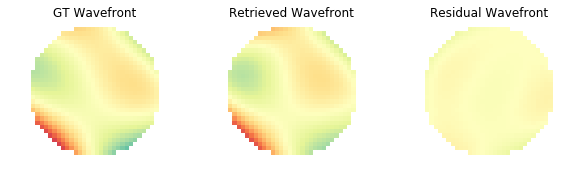

Random_10


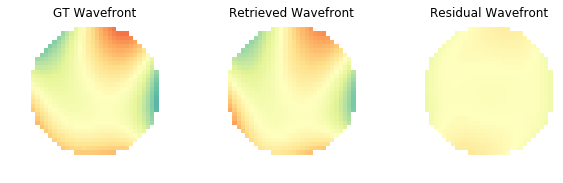

Random_11


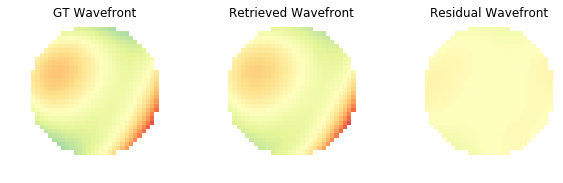

Random_12


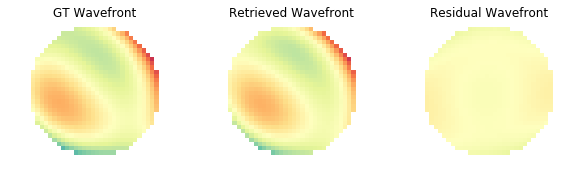

Random_13


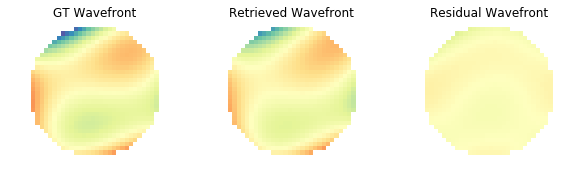

Random_14


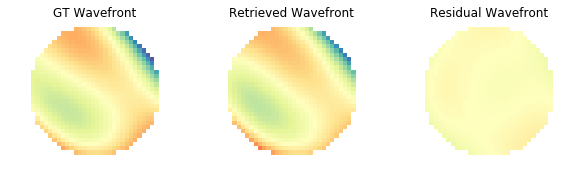

Random_15


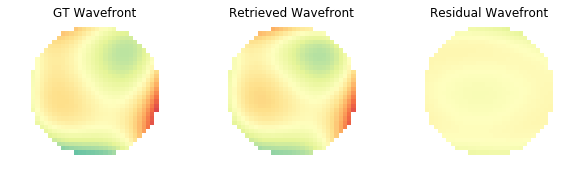

Random_16


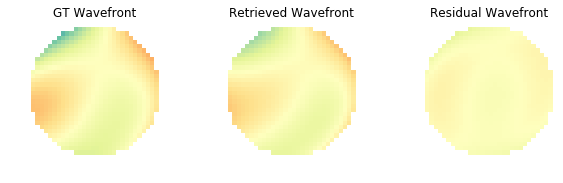

Random_17


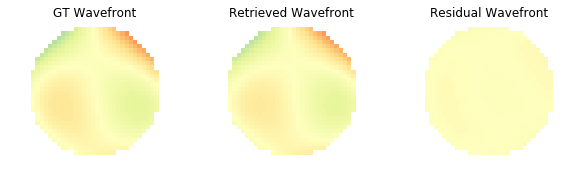

Random_18


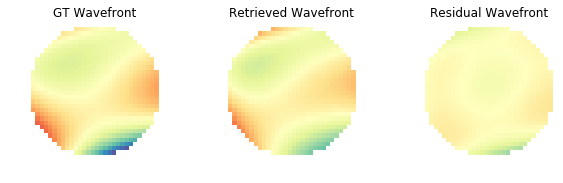

Random_19


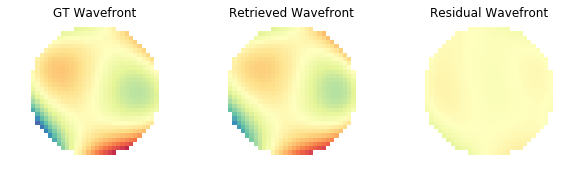

Random_2


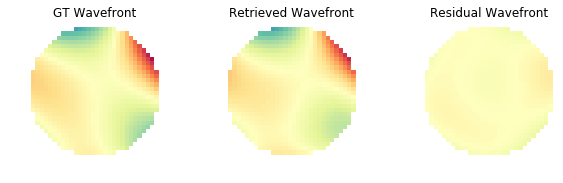

Random_20


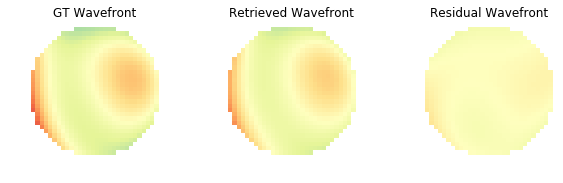

Random_21


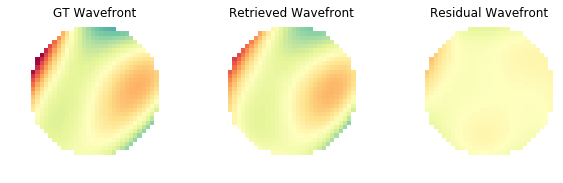

Random_22


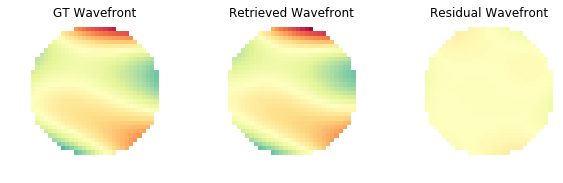

Random_23


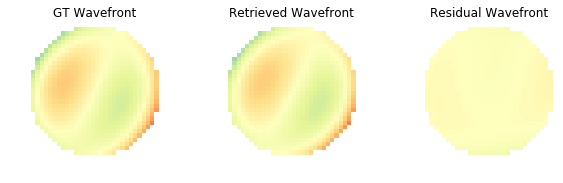

Random_24


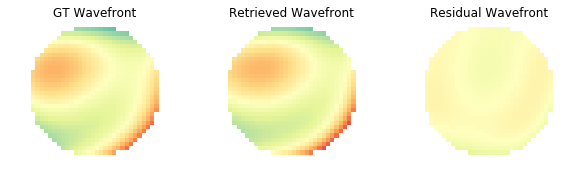

Random_25


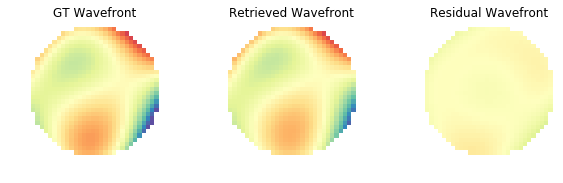

Random_26


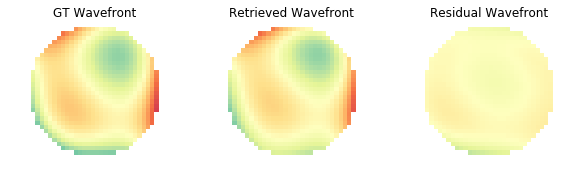

Random_27


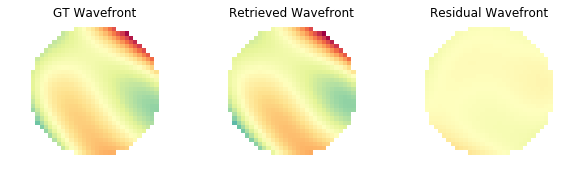

Random_28


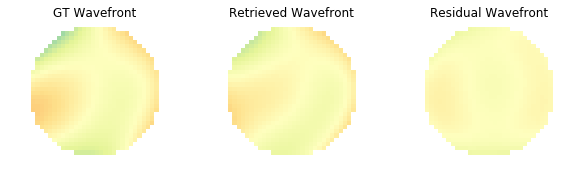

Random_29


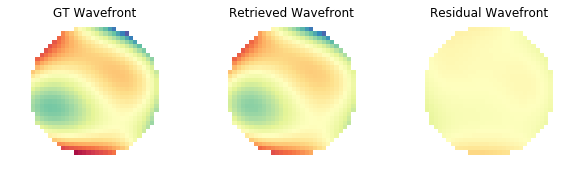

Random_3


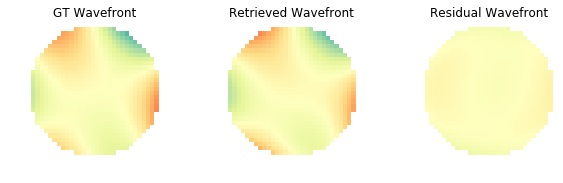

Random_30


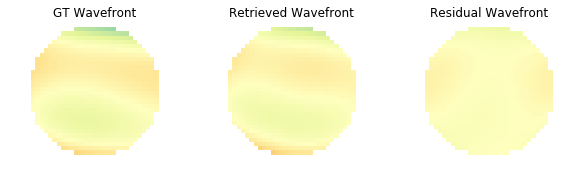

Random_31


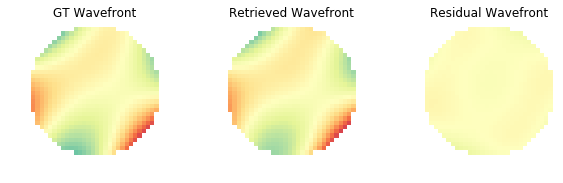

Random_32


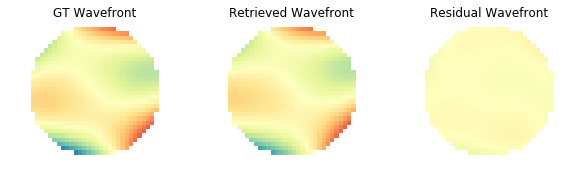

Random_33


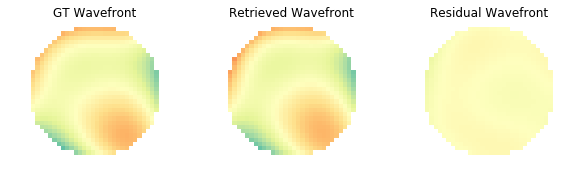

Random_34


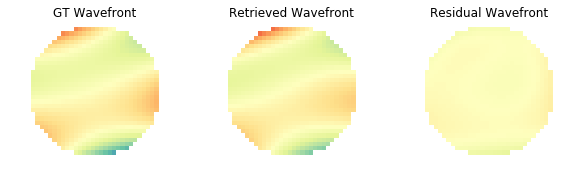

Random_35


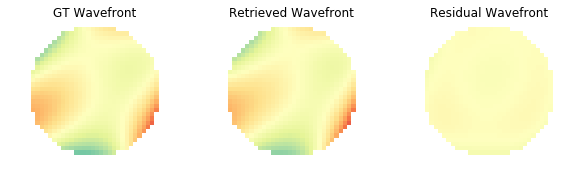

Random_36


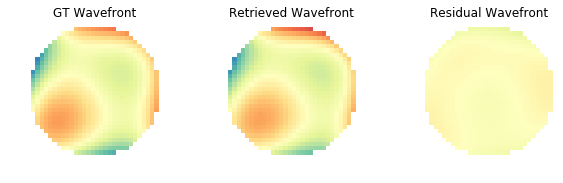

Random_37


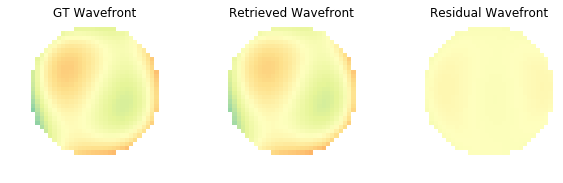

Random_38


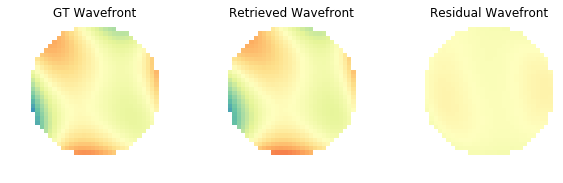

Random_39


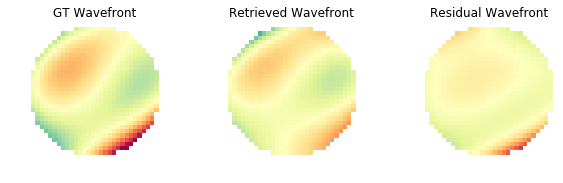

Random_4


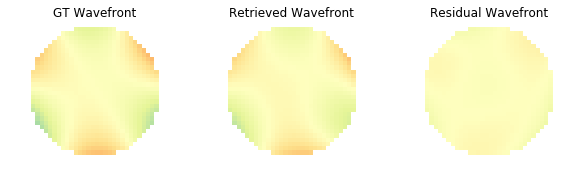

Random_40


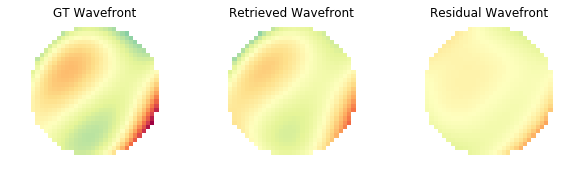

Random_41


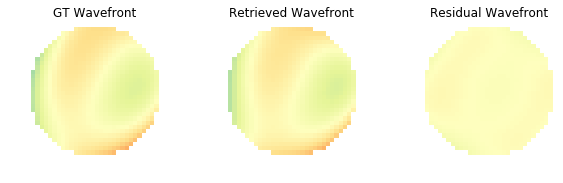

Random_42


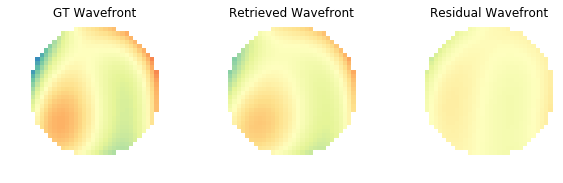

Random_43


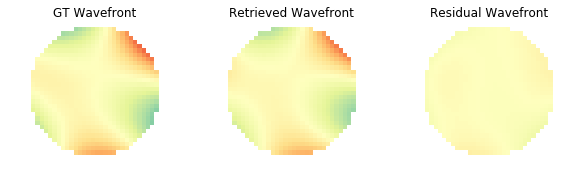

Random_44


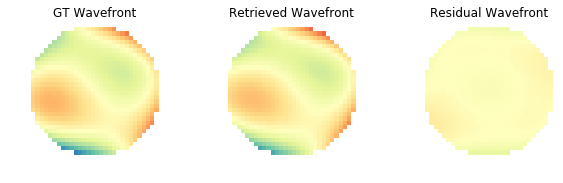

Random_45


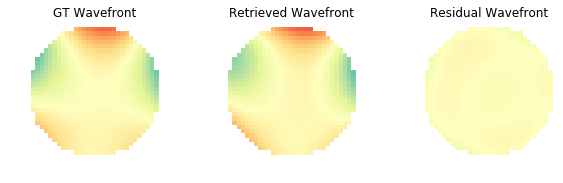

Random_46


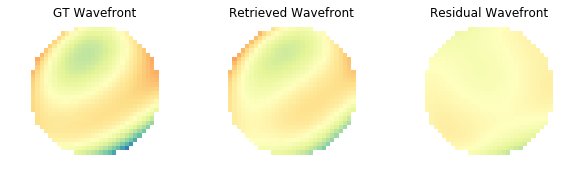

Random_47


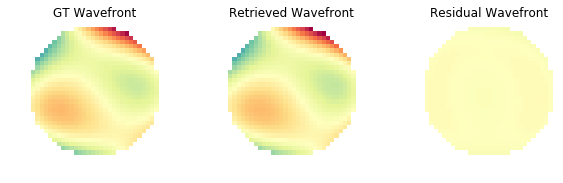

Random_48


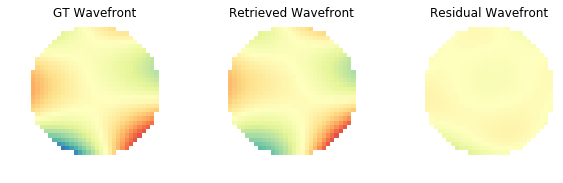

Random_49


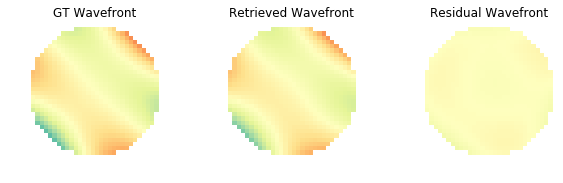

Random_5


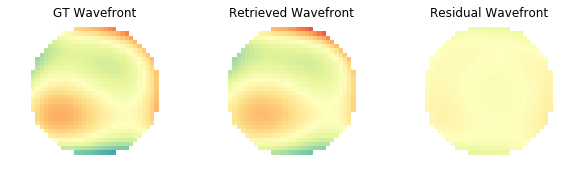

Random_50


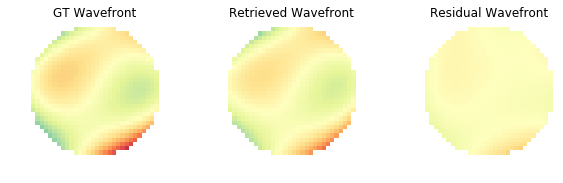

Random_6


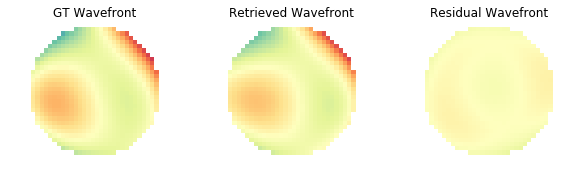

Random_7


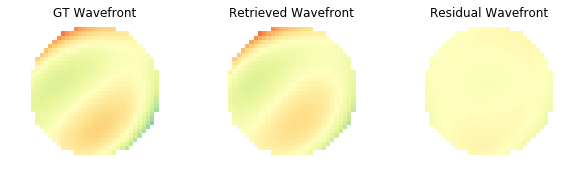

Random_8


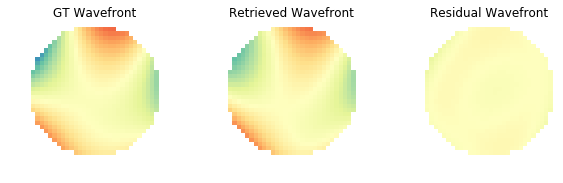

Random_9


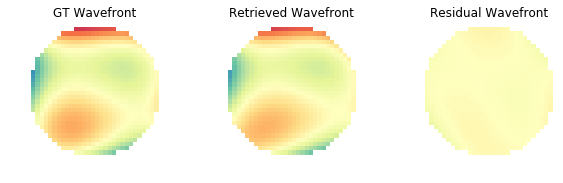

In [19]:
rmse = []
for name,p in random_mode_result.items():
    print(name)
    p_wavefront = ZernikeWavefront(p, order='ansi') 
    gt = random_mode_gt[name]
    gt_wavefront = ZernikeWavefront(gt, order='noll') 
    
    rmse.append(np.sqrt(np.nanmean((gt_wavefront.polynomial(32)-p_wavefront.polynomial(32))**2)))
    fig, (a,b,c) = plt.subplots(1,3, figsize=(10,2.5))
    a.set_title("GT Wavefront")
    a.imshow(np.flip(np.rot90(gt_wavefront.polynomial(32)),axis=0), clim=(-0.5,0.5), cmap='Spectral_r')
    b.set_title("Retrieved Wavefront")
    b.imshow(np.flip(np.rot90(p_wavefront.polynomial(32)),axis=0), clim=(-0.5,0.5), cmap='Spectral_r')
    c.set_title("Residual Wavefront")
    c.imshow(np.flip(np.rot90(gt_wavefront.polynomial(32) - p_wavefront.polynomial(32)),axis=0), clim=(-0.5,0.5), cmap='Spectral_r')
    for ax in (a,b,c): ax.axis('off')
    plt.show()
None;